<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Dataset Description</title>
    <style>
        body {
            font-family: Arial, sans-serif;
        }
        h1 {
            color: red;
        }
        h2 {
            color: blue;
        }
        .feature-list {
            margin-left: 20px;
        }
        .feature-list li {
            color: #34495e;
        }
        .target-variable {
            color: #c0392b;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <h1>About Dataset</h 
1>
<h3> <p style="color: blue;">About Dataset
This dataset contains synthetic data for employee attrition. The data was generated to simulate a scenario where various factor
 influence whether an employee stays with a company or leaves. This dataset can be used for predictive modeling, data analysis,
 and machine learning tasks related to employee turnover.>

In [101]:
import numpy as np 
import pandas as  pd 
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline 

In [1]:
!pip install --upgrade seaborn

In [102]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [103]:
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder

In [105]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer

In [106]:
employee_attrition_datasets = pd.read_csv('employee_attrition_data.csv')
employee_attrition_datasets.sample(5)

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
103,103,49,Female,HR,Analyst,7,0.704204,187,0,93226,1
48,48,36,Female,HR,Accountant,8,0.322018,200,0,38871,0
237,237,44,Female,HR,Engineer,4,0.835614,150,1,99851,1
446,446,30,Female,Engineering,Analyst,9,0.824460,182,1,67919,1
137,137,36,Male,Marketing,Manager,5,0.956582,238,1,50064,1


In [107]:
employee_attrition_datasets = employee_attrition_datasets.drop(columns = ['Employee_ID'],axis = 1)
employee_attrition_datasets.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [108]:
# employee_attrition_datasets = employee_attrition_datasets.drop(columns = ['Satisfaction_Level'],axis = 1)
# employee_attrition_datasets.head()

In [109]:
employee_attrition_datasets.shape

(1000, 10)

In [110]:
employee_attrition_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Department             1000 non-null   object 
 3   Job_Title              1000 non-null   object 
 4   Years_at_Company       1000 non-null   int64  
 5   Satisfaction_Level     1000 non-null   float64
 6   Average_Monthly_Hours  1000 non-null   int64  
 7   Promotion_Last_5Years  1000 non-null   int64  
 8   Salary                 1000 non-null   int64  
 9   Attrition              1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [111]:
employee_attrition_datasets.isnull().sum()

Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [112]:
employee_attrition_datasets_r = employee_attrition_datasets.duplicated().sum()
print(f'Number of the duplicate rows : {employee_attrition_datasets_r}')

Number of the duplicate rows : 0


In [113]:
employee_attrition_datasets.describe()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [114]:
employee_attrition_datasets.describe().corr()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
Age,1.000000,0.999290,0.999029,0.983536,0.999024,-0.580293,0.999024
Years_at_Company,0.999290,1.000000,0.999972,0.976219,0.999972,-0.609306,0.999972
Satisfaction_Level,0.999029,0.999972,1.000000,0.975047,1.000000,-0.614926,1.000000
Average_Monthly_Hours,0.983536,0.976219,0.975047,1.000000,0.975004,-0.443181,0.975004
Promotion_Last_5Years,0.999024,0.999972,1.000000,0.975004,1.000000,-0.614959,1.000000
Salary,-0.580293,-0.609306,-0.614926,-0.443181,-0.614959,1.000000,-0.614959
Attrition,0.999024,0.999972,1.000000,0.975004,1.000000,-0.614959,1.000000


feature contraction

now we applying the eda

In [115]:
employee_attrition_datasets.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [116]:
employee_attrition_datasets['Age'].value_counts()

Age
45    41
27    37
44    37
52    36
39    36
50    35
32    33
41    33
28    32
57    32
48    30
30    30
46    30
55    30
42    30
47    29
49    29
54    28
58    27
33    26
59    26
26    26
31    26
38    25
40    25
56    25
34    24
51    24
36    24
25    24
53    24
37    23
29    23
43    21
35    19
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12592\916188011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Age',data = employee_attrition_datasets,palette='Set2',edgecolor="black",width=0.1)


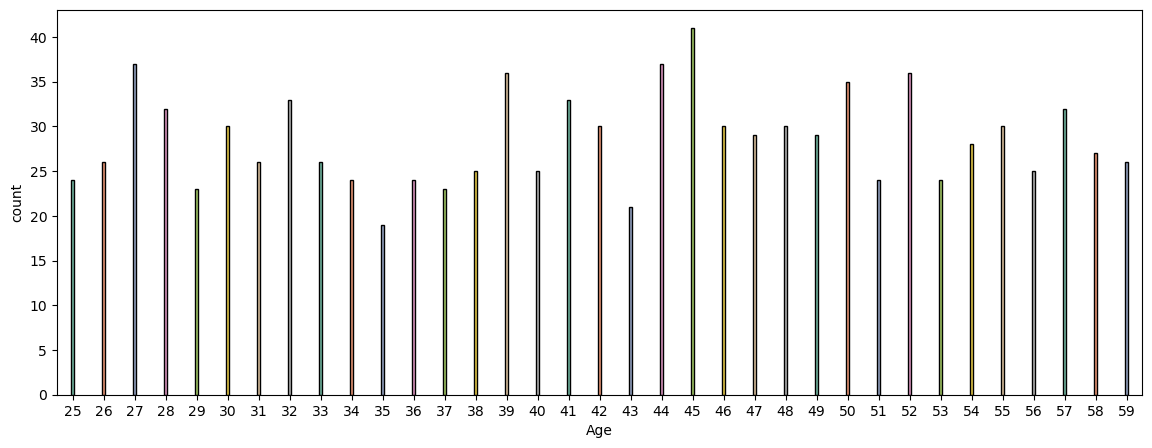

In [117]:
plt.figure(figsize=(14,5))
sns.countplot(x = 'Age',data = employee_attrition_datasets,palette='Set2',edgecolor="black",width=0.1)
# plt.grid()
plt.show()

In [118]:
employee_attrition_datasets['Gender'].value_counts()

Gender
Male      506
Female    494
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12592\847574285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender',data = employee_attrition_datasets,palette='Set2',edgecolor="black",width=0.1)


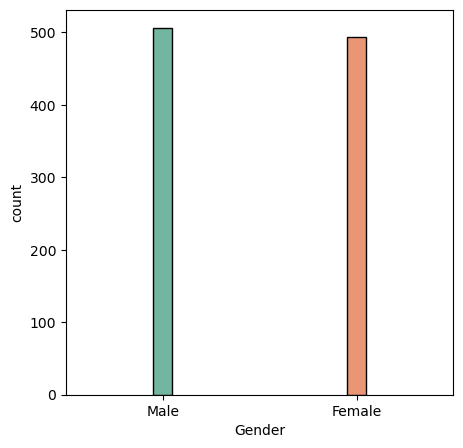

In [119]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Gender',data = employee_attrition_datasets,palette='Set2',edgecolor="black",width=0.1)
# plt.grid()
plt.show()

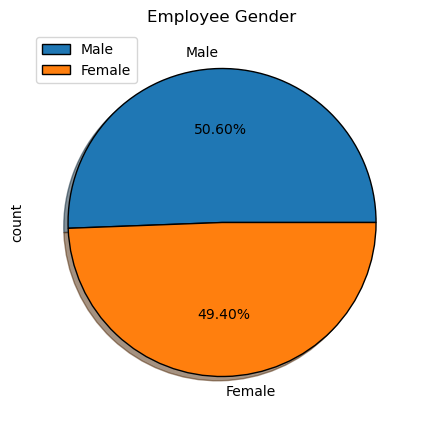

In [120]:
plt.figure(figsize = (14,5))
# ex = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6]
employee_attrition_datasets['Gender'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
plt.title('Employee Gender')
plt.legend(loc='upper left')
plt.show()

In [121]:
employee_attrition_datasets['Department'].value_counts()

Department
Sales          209
Finance        206
Engineering    204
HR             191
Marketing      190
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12592\2531704871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Department',data = employee_attrition_datasets,palette='Set2',edgecolor="black",width=0.1)


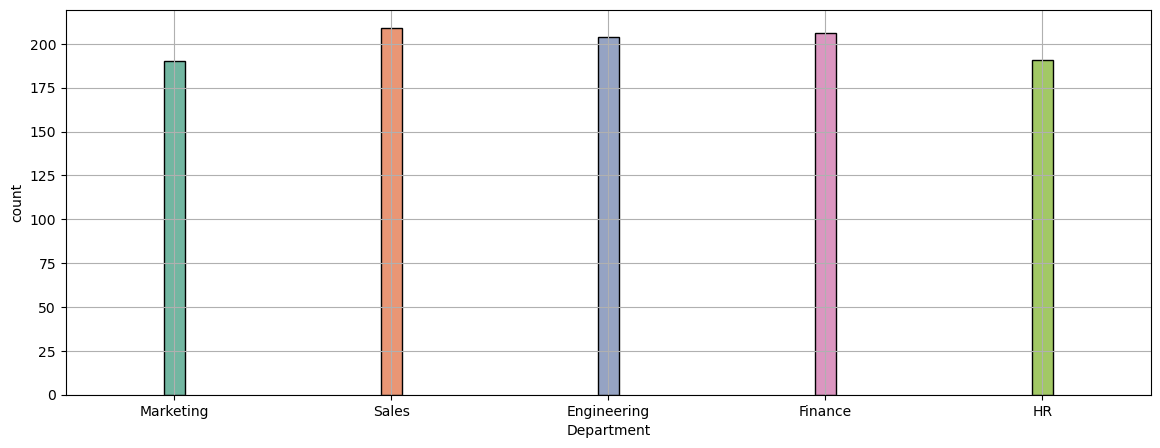

In [122]:
plt.figure(figsize=(14,5))
sns.countplot(x = 'Department',data = employee_attrition_datasets,palette='Set2',edgecolor="black",width=0.1)
plt.grid()
plt.show()

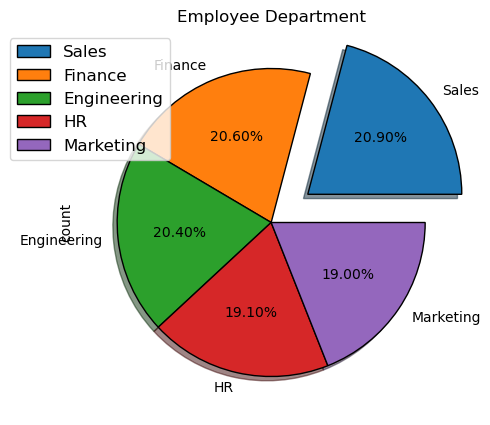

In [123]:
plt.figure(figsize = (14,5))
ex = [0.3,0.0,0.0,00,0.0]
employee_attrition_datasets['Department'].value_counts().plot(kind = 'pie',explode = ex,autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
plt.title('Employee Department')
plt.legend(loc='upper left',fontsize='large',bbox_to_anchor=(-0.2, 1))
plt.show()

In [124]:
employee_attrition_datasets['Job_Title'].value_counts()

Job_Title
Engineer         214
Manager          206
Accountant       206
Analyst          195
HR Specialist    179
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12592\3343903588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Job_Title',data = employee_attrition_datasets,palette='Set2',edgecolor="black",width=0.3)


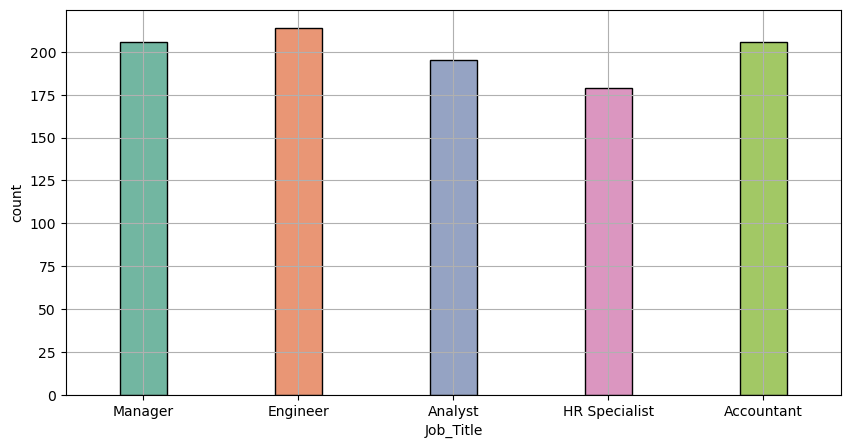

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Job_Title',data = employee_attrition_datasets,palette='Set2',edgecolor="black",width=0.3)
plt.grid()
plt.show()

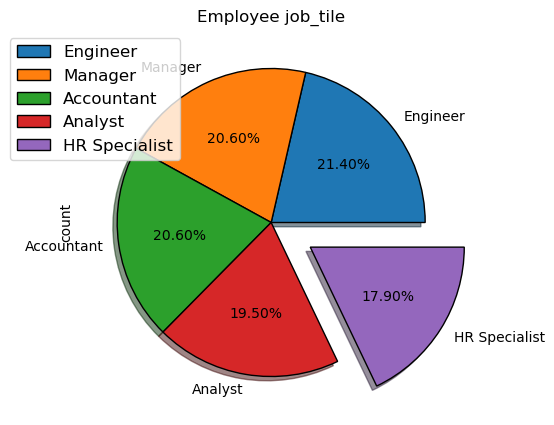

In [126]:
plt.figure(figsize = (14,5))
ex = [0.0,0.0,0.0,00,0.3]
employee_attrition_datasets['Job_Title'].value_counts().plot(kind = 'pie',explode = ex,autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
plt.title('Employee job_tile')
plt.legend(loc='upper left',fontsize='large',bbox_to_anchor=(-0.2, 1))
plt.show()

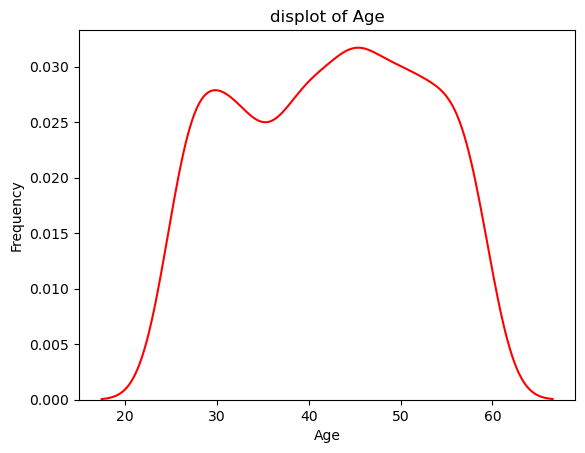

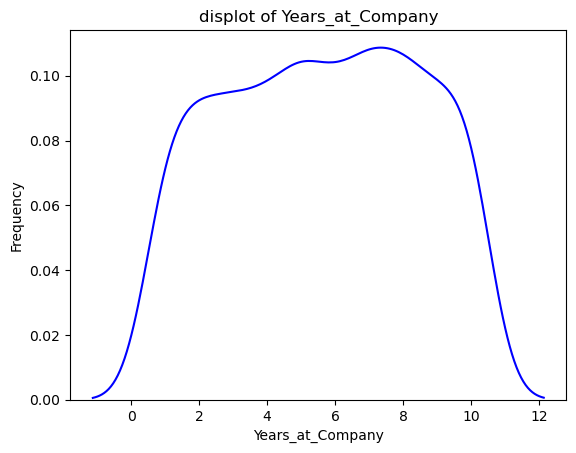

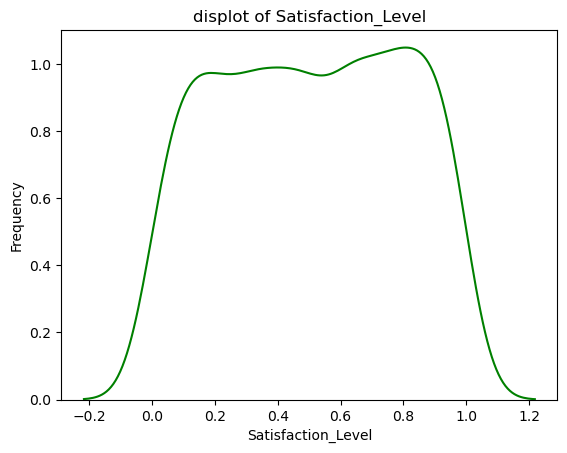

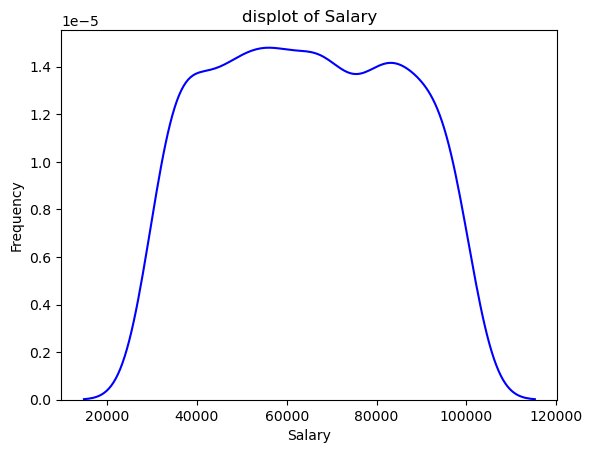

In [127]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for column in employee_attrition_datasets.columns:
    
    if column == 'employee_id':
      plt.figure()
      sns.kdeplot(employee_attrition_datasets[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   
    elif  column == 'Age':
      plt.figure()
      sns.kdeplot(employee_attrition_datasets[column], color="red")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   
    elif column == 'Years_at_Company':
      plt.figure()
      sns.kdeplot(employee_attrition_datasets[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   
    elif column == 'Satisfaction_Level':
      plt.figure()
      sns.kdeplot(employee_attrition_datasets[column], color="green")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   
    elif column == 'Salary':
      plt.figure()
      sns.kdeplot(employee_attrition_datasets[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   

In the data not have the oulies 

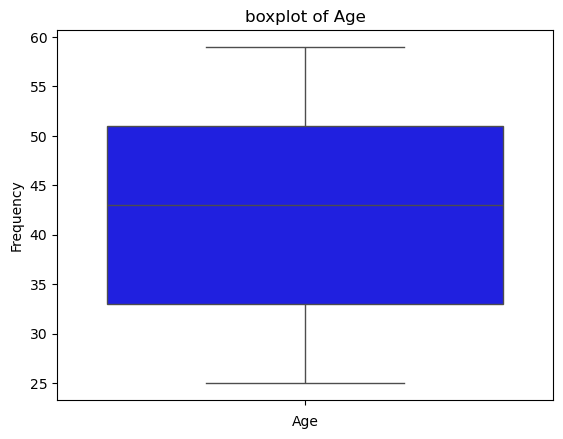

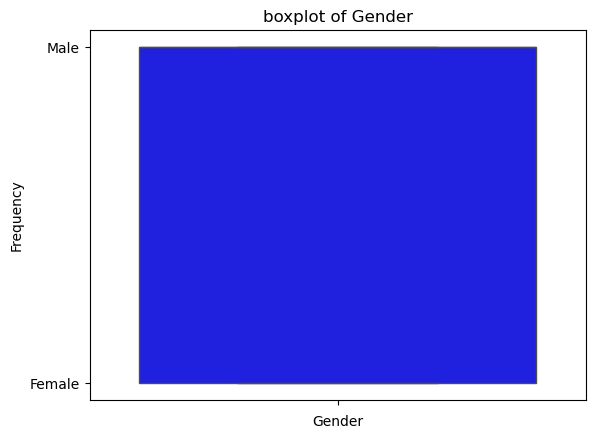

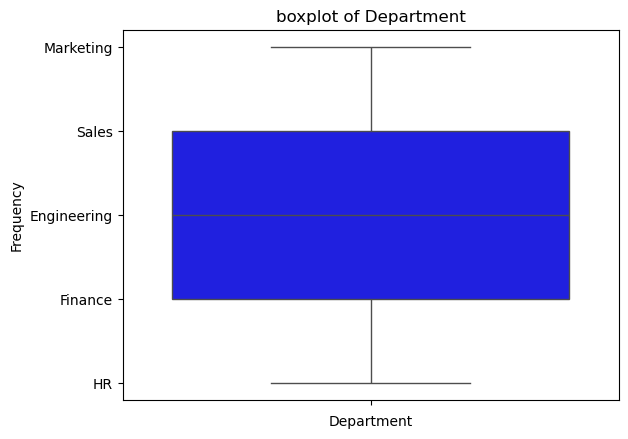

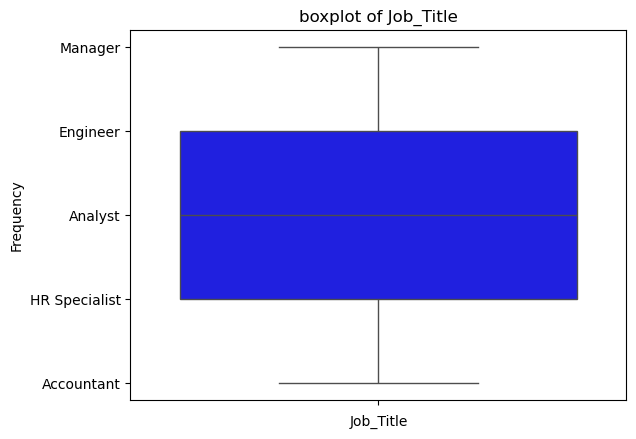

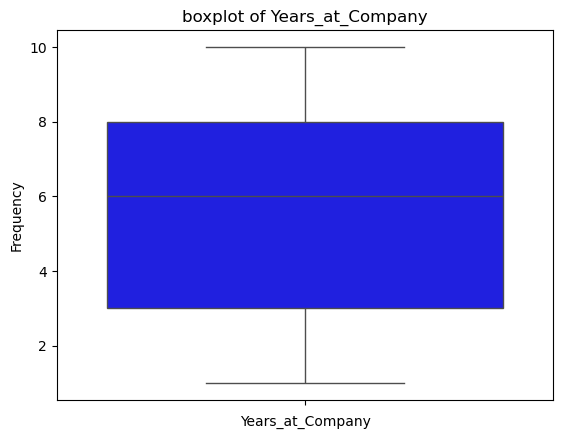

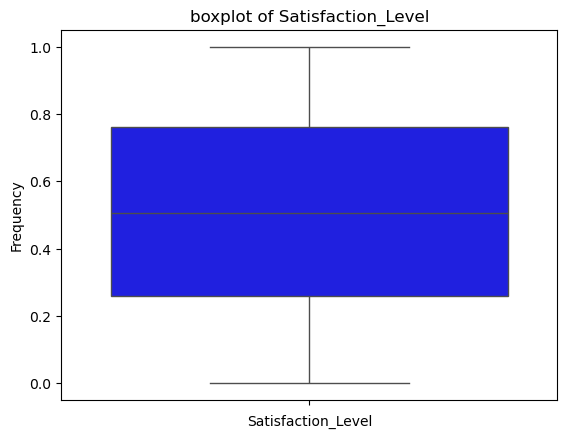

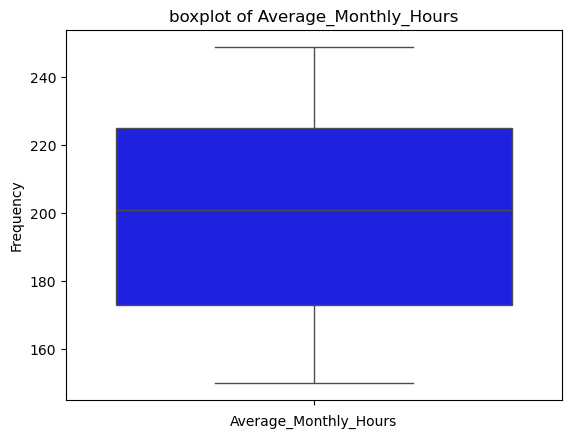

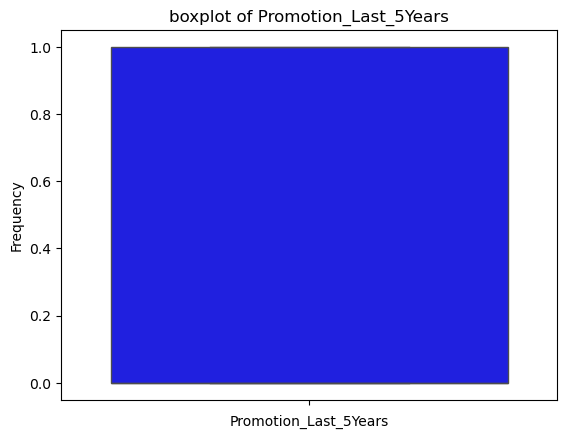

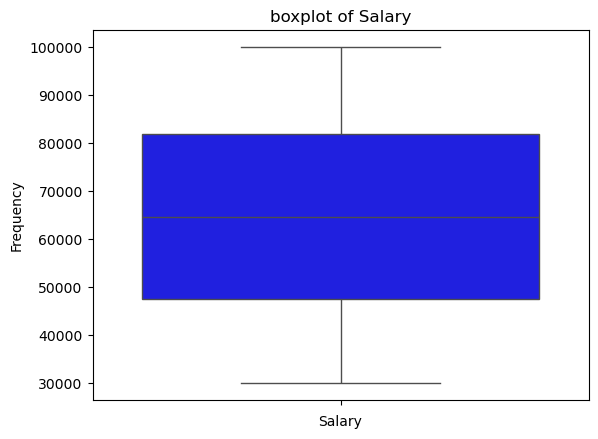

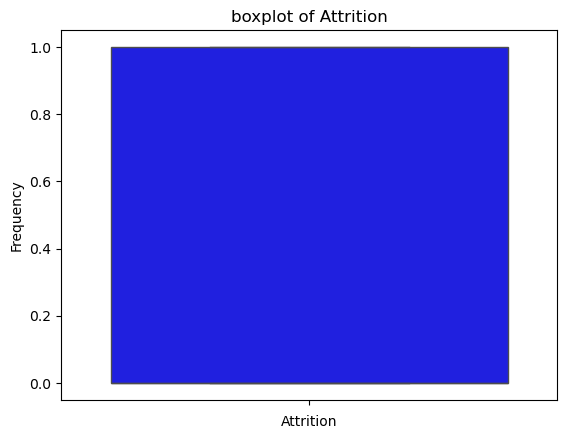

In [128]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for column in employee_attrition_datasets.columns:
    
    # if column == 'employee_id':
      plt.figure()
      sns.boxplot(employee_attrition_datasets[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'boxplot of {column}')  # Set plot titl
      plt.show()   
  

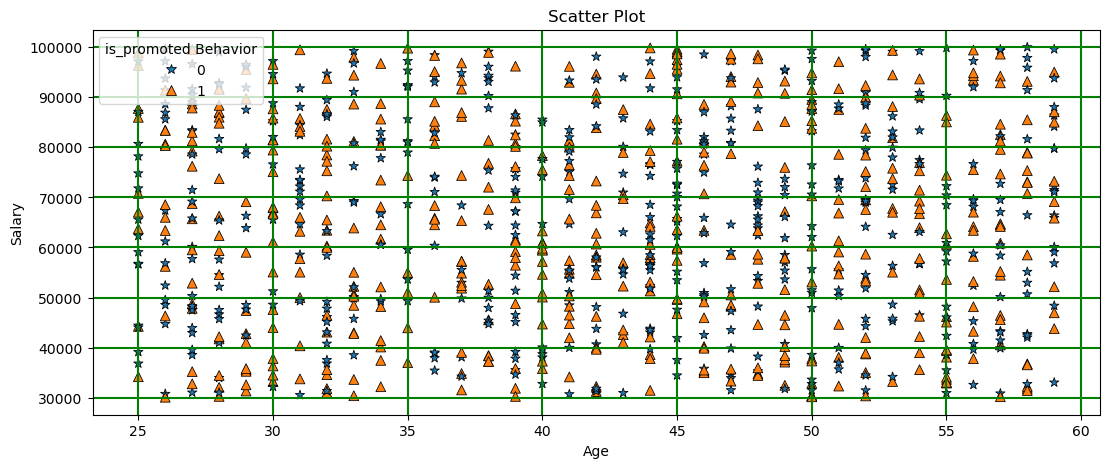

In [129]:
# Creating a scatter plotm 
plt.figure(figsize = (13,5))
m = {0:"*",1:"^"}
sns.scatterplot(x='Age', y='Salary',data =employee_attrition_datasets,color = 'r',hue = 'Attrition',style = "Attrition",markers = m,s=50,edgecolor='black')
plt.title('Scatter Plot')
plt.legend(title='is_promoted Behavior',loc='upper left')
plt.grid(True,color = 'green',linewidth=1.5)

# Displaying the plot
plt.show()

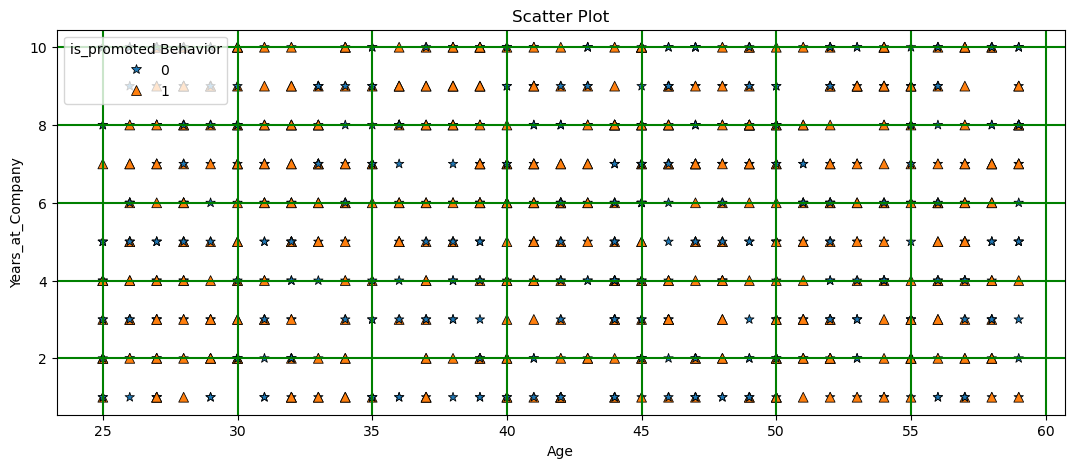

In [130]:
# Creating a scatter plotm 
plt.figure(figsize = (13,5))
m = {0:"*",1:"^"}
sns.scatterplot(x='Age', y='Years_at_Company',data =employee_attrition_datasets,color = 'r',hue = 'Attrition',style = "Attrition",markers = m,s=50,edgecolor='black')
plt.title('Scatter Plot')
plt.legend(title='is_promoted Behavior',loc='upper left')
plt.grid(True,color = 'green',linewidth=1.5)

# Displaying the plot
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12592\1630225643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Years_at_Company', data=employee_attrition_datasets, palette='coolwarm', edgecolor='black',width=0.2)


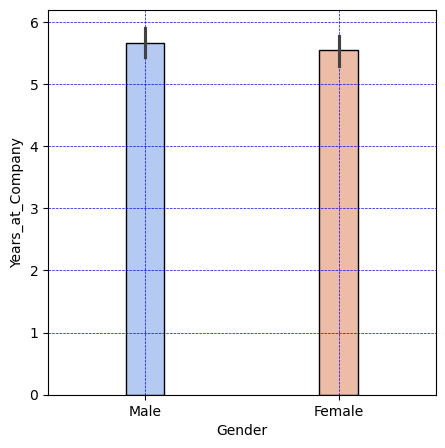

In [131]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Gender', y='Years_at_Company', data=employee_attrition_datasets, palette='coolwarm', edgecolor='black',width=0.2)
# Adding gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5,color = 'b')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12592\486202036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Salary', data=employee_attrition_datasets, palette='coolwarm', edgecolor='black',width=0.1)


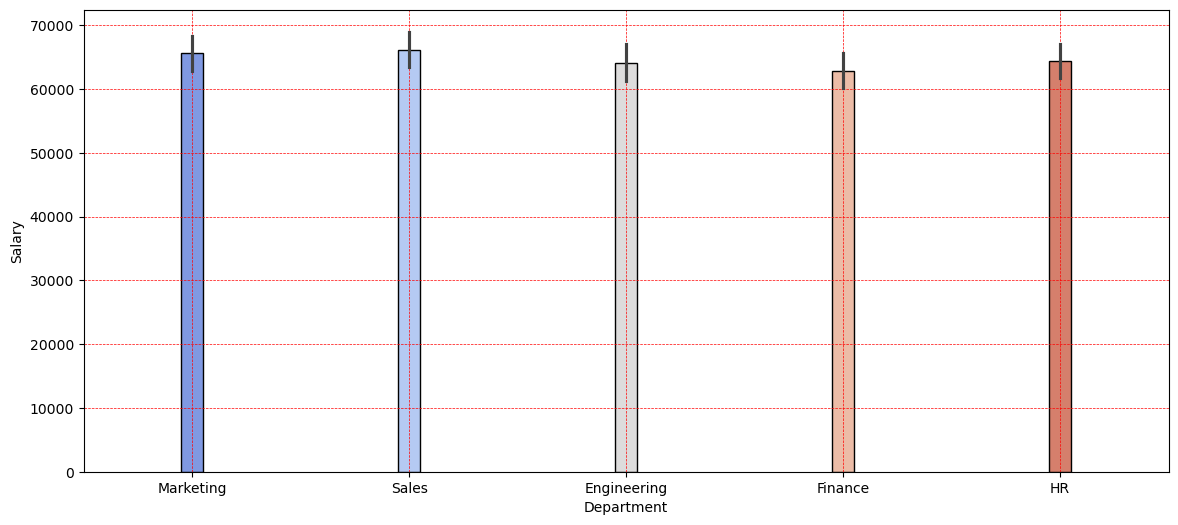

In [132]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Department', y='Salary', data=employee_attrition_datasets, palette='coolwarm', edgecolor='black',width=0.1)
# Adding gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5,color = 'r')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12592\3342515513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job_Title', y='Age', data=employee_attrition_datasets, palette='coolwarm', edgecolor='black',width=0.2)


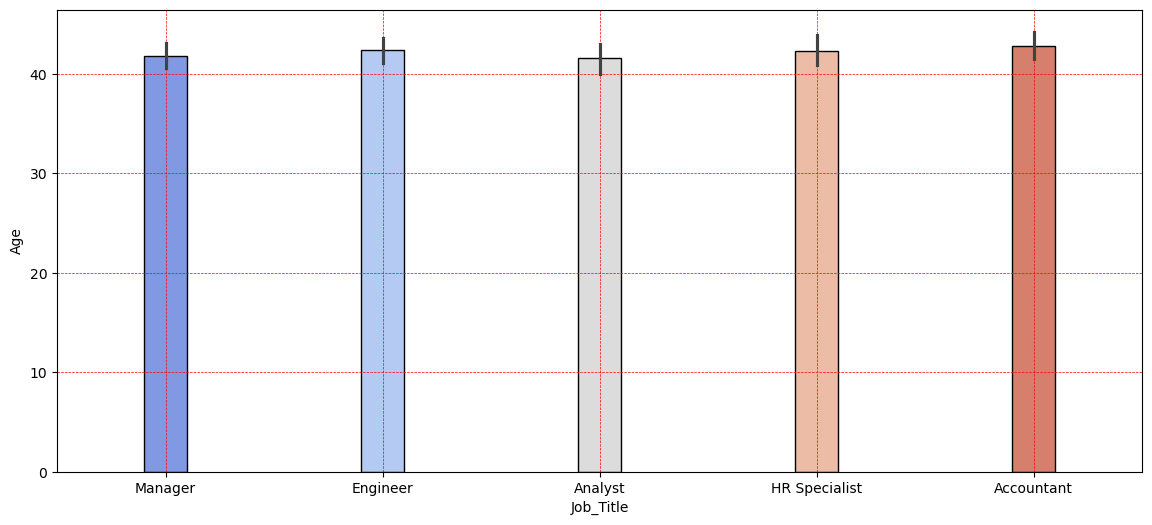

In [133]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Job_Title', y='Age', data=employee_attrition_datasets, palette='coolwarm', edgecolor='black',width=0.2)
# Adding gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5,color = 'r')
plt.show()

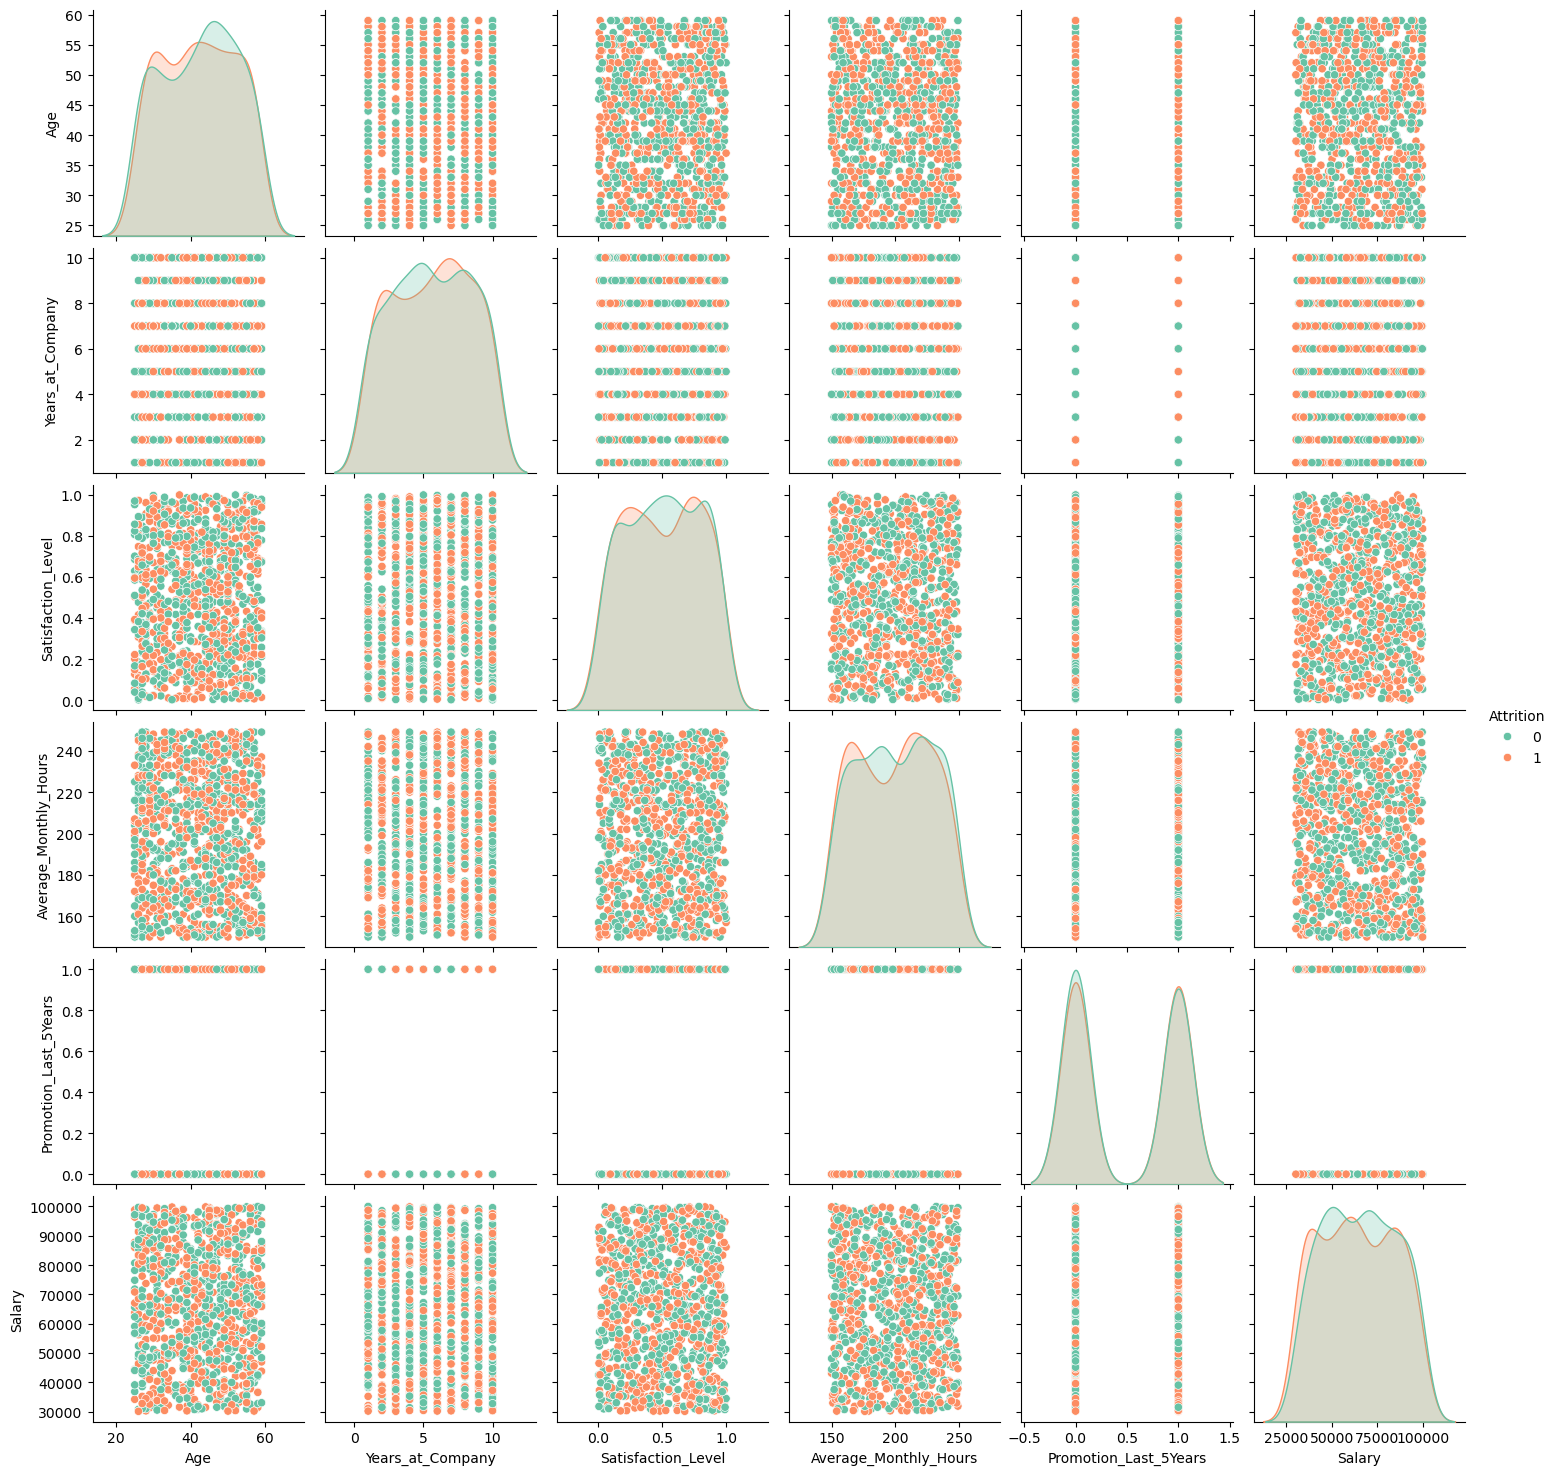

In [134]:
# fist we applying the pair polt
sns.pairplot(employee_attrition_datasets,hue = 'Attrition',palette='Set2')
plt.show()

In [135]:
correlation_matrix = employee_attrition_datasets.describe().corr()
correlation_matrix

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
Age,1.000000,0.999290,0.999029,0.983536,0.999024,-0.580293,0.999024
Years_at_Company,0.999290,1.000000,0.999972,0.976219,0.999972,-0.609306,0.999972
Satisfaction_Level,0.999029,0.999972,1.000000,0.975047,1.000000,-0.614926,1.000000
Average_Monthly_Hours,0.983536,0.976219,0.975047,1.000000,0.975004,-0.443181,0.975004
Promotion_Last_5Years,0.999024,0.999972,1.000000,0.975004,1.000000,-0.614959,1.000000
Salary,-0.580293,-0.609306,-0.614926,-0.443181,-0.614959,1.000000,-0.614959
Attrition,0.999024,0.999972,1.000000,0.975004,1.000000,-0.614959,1.000000


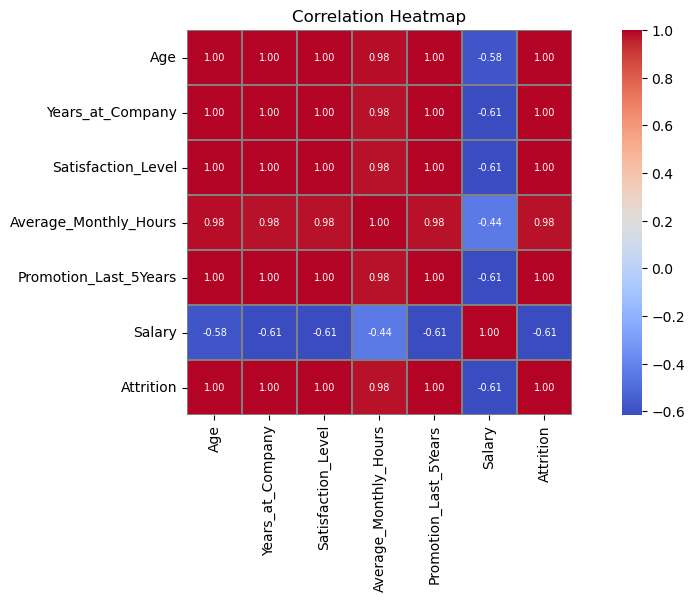

In [136]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

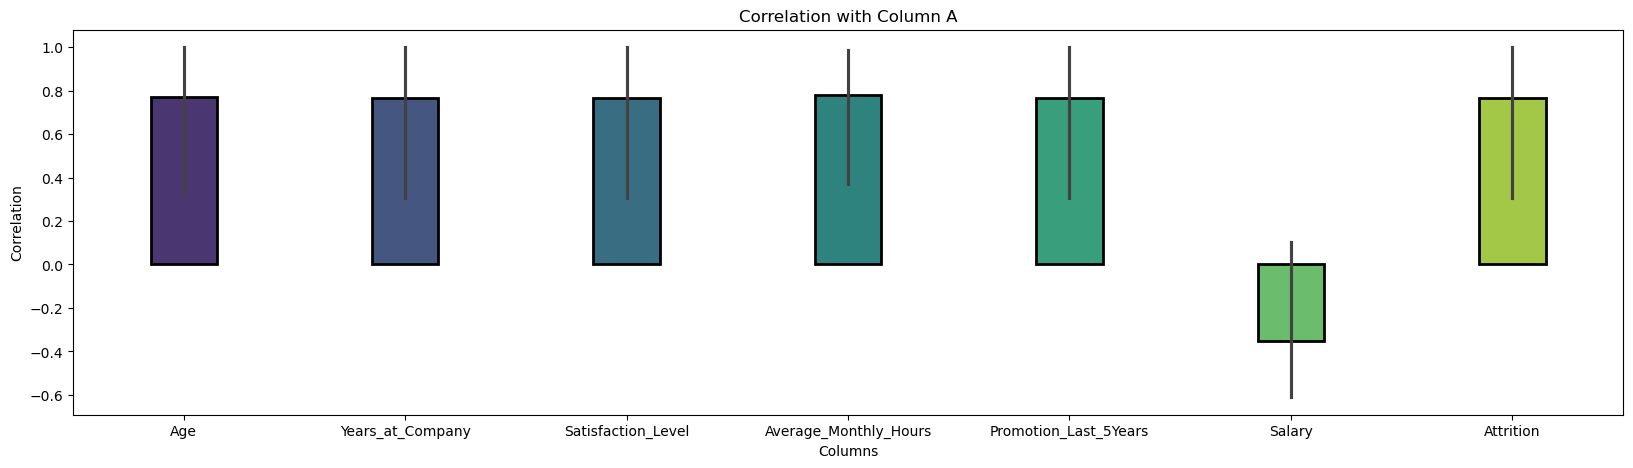

In [137]:
plt.figure(figsize=(20, 5))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=2,width=0.3)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

In [138]:
employee_attrition_datasets.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [139]:
x = employee_attrition_datasets.drop('Attrition',axis = 1)
y = employee_attrition_datasets['Attrition']

In [140]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state = 42)

In [141]:
# Define the preprocessing steps for numerical and categorical columns

numerical_features_scalling = ['Age','Years_at_Company','Average_Monthly_Hours','Promotion_Last_5Years','Salary']
categorical_features = ['Gender', 'Department', 'Job_Title']

In [142]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)

In [143]:
# Create an ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('svc', model3)
], voting='soft')


In [144]:
numerical_scaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])

categorical_encoding_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

In [145]:
preprocessor = ColumnTransformer(
    transformers=[
        
        ('num_scaler', numerical_scaler_transformer, numerical_features_scalling),
        ('cat', categorical_encoding_transformer, categorical_features)
    ])

In [147]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('classifier', LogisticRegression())
    # ('classifier', XGBClassifier())
    ('ensemble', ensemble)
])

In [148]:
from sklearn import set_config
# Plot the pipeline
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years_at_Company',
                                                   'Average_Monthly_Hours',
                                                   'Promotion_Last_5Years',
                                                   'Salary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Department',
                                                   'Job_Title'])])),
                ('ensemble',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('dt', DecisionTreeClassifier()),
                                              ('svc', SVC(probability=True))],
                                  voting='soft'))])

In [149]:
# Assuming X_train, y_train are your training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years_at_Company',
                                                   'Average_Monthly_Hours',
                                                   'Promotion_Last_5Years',
                                                   'Salary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Department',
                                                   'Job_Title'])])),
                ('ensemble',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('dt', DecisionTreeClassifier()),
                                              ('svc', SVC(probability=True))],
                                  voting='soft'))])

In [150]:
# Assuming X_test, y_test are your test data
y_pred = pipeline.predict(x_test)

In [153]:
accuracy = accuracy_score(y_test,y_pred)

In [154]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.48
